# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for weather queries:
weather_query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# the lists to be used in the dataframe:
city_names = []
countries = []
dates = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
cloudiness = []
humidities = []

# Counting variables for query loop:
record_count = 0
set_count = 1

# Loop that creates dataframe's columns:
for city in cities:
    try:
        response = requests.get(weather_query_url + city.replace(" ", "&")).json()
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        # Print log:
        if record_count > 48:
            record_count = 1
            set_count += 1
            city_names.append(city)
        else:
            record_count += 1
            city_names.append(city)
            print(f'Processing Record {record_count} of Set {set_count} | {city}')
    except:
        print('City not found. Skipping...')
print('----------Data Retrieval Complete----------')            

Processing Record 1 of Set 1 | dhidhdhoo
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | itarema
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | sterling
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | notodden
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | olot
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | huckeswagen
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | orda
Processing Record 15 of Set 1 | churapcha
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | east lo

Processing Record 40 of Set 4 | villa carlos paz
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | inhambane
Processing Record 43 of Set 4 | innisfail
Processing Record 44 of Set 4 | gamba
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | inta
Processing Record 49 of Set 4 | assiniboia
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | kondoa
City not found. Skipping...
Processing Record 5 of Set 5 | charleville-mezieres
Processing Record 6 of Set 5 | skibotn
Processing Record 7 of Set 5 | biak
Processing Record 8 of Set 5 | atasu
Processing Record 9 of Set 5 | tessalit
Processing Record 10 of Set 5 | mbanza-ngungu
Processing Record 11 of Set 5 | motygino
Processing Record 12 of Set 5 | kavaratti
Processing Record 13 of Set 5 | grand river south east
Processing Record 14 of Set 5 | wanaka
Processing Record 15 of

Processing Record 35 of Set 8 | sibu
Processing Record 36 of Set 8 | kushiro
City not found. Skipping...
Processing Record 37 of Set 8 | skjervoy
Processing Record 38 of Set 8 | algiers
City not found. Skipping...
Processing Record 39 of Set 8 | soyo
Processing Record 40 of Set 8 | balkhash
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | chapayevka
Processing Record 43 of Set 8 | mogadishu
Processing Record 44 of Set 8 | uvalde
Processing Record 45 of Set 8 | pucallpa
Processing Record 46 of Set 8 | tarakan
Processing Record 47 of Set 8 | skibbereen
Processing Record 48 of Set 8 | whitehorse
Processing Record 49 of Set 8 | kuching
Processing Record 2 of Set 9 | doha
Processing Record 3 of Set 9 | taoudenni
Processing Record 4 of Set 9 | vanavara
Processing Record 5 of Set 9 | micheweni
City not found. Skipping...
Processing Record 6 of Set 9 | juneau
City not found. Skipping...
Processing Record 7 of Set 9 | ostrov
Processing Record 8 of Set 9 | pokaran
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# A weather dictionary of lists for dataframe:
weather_dictionary = {
    "City":city_names,
    "Country":countries,
    "Date":dates,
    "Lat.":latitudes,
    "Lon.":longitudes,
    "Max Temp.":max_temps,
    "Wind Speed":wind_speeds,
    "Cloudiness":cloudiness,
    "Humidity":humidities
}

In [9]:
# Convert data into dataframe:
weather_df = pd.DataFrame(weather_dictionary)
# Displaying top five rows of dataframe:
weather_df.head()

,City,Country,Date,Lat.,Lon.,Max Temp.,Wind Speed,Cloudiness,Humidity
0,dhidhdhoo,MV,1615571910,6.8833,73.1000,83.43,13.51,3,75
1,norman wells,US,1615571691,35.2226,-97.4395,71.60,18.41,90,73
2,itarema,BR,1615571910,-2.9248,-39.9167,84.76,16.06,100,68
3,kapaa,US,1615571910,22.0752,-159.3190,73.00,12.66,90,88
4,sterling,US,1615571910,39.0062,-77.4286,62.01,8.05,90,72


In [ ]:
# Output dataframe as CSV file (for use in VacationPy)
weather_df.to_csv(weather_df_csv)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Step skipped. After looking at Latitude vs. Humidity scatter plot, no cities were above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

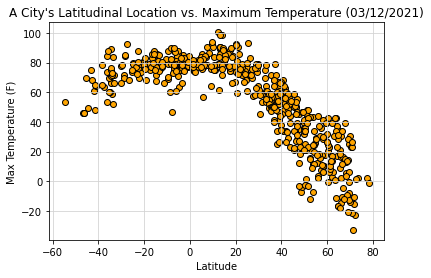

In [10]:
plt.scatter(weather_df["Lat."], weather_df["Max Temp."], edgecolors = "black", facecolors = "orange")
plt.title("A City's Latitudinal Location vs. Maximum Temperature (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.show()

## Latitude vs. Humidity Plot

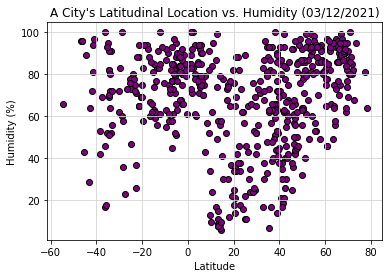

In [11]:
plt.scatter(weather_df["Lat."], weather_df["Humidity"], edgecolors = "black", facecolors = "purple")
plt.title("A City's Latitudinal Location vs. Humidity (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.show()

## Latitude vs. Cloudiness Plot

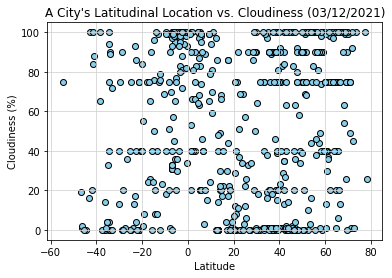

In [12]:
plt.scatter(weather_df["Lat."], weather_df["Cloudiness"], edgecolors = "black", facecolors = "skyblue")
plt.title("A City's Latitudinal Location vs. Cloudiness (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.show()

## Latitude vs. Wind Speed Plot

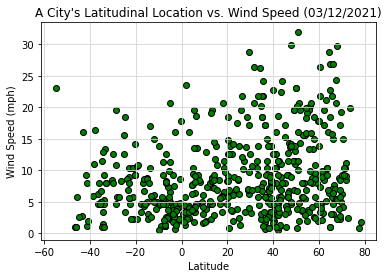

In [13]:
plt.scatter(weather_df["Lat."], weather_df["Wind Speed"], edgecolors = "black", facecolors = "green")
plt.title("A City's Latitudinal Location vs. Wind Speed (03/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major", axis = "both", linestyle = '-', color = "lightgrey")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression